In [1]:
import seaborn as sns
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

## Read CSV File

In [4]:
url='/kaggle/input/cardataset/data.csv'
df= pd.read_csv('CO2.csv')
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [5]:
df.shape

(36, 5)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [111]:
df.describe().style.background_gradient(cmap='Reds')

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [7]:
df['Car'].value_counts()

Mercedes      5
Ford          5
Skoda         4
Audi          3
BMW           3
Opel          3
Volvo         3
VW            1
Mitsubishi    1
Hyundai       1
Suzuki        1
Honda         1
Hundai        1
Mini          1
Fiat          1
Mazda         1
Toyoty        1
Name: Car, dtype: int64

# Normality Test by Graph

### Box Plot
- Box plot is first check to test normality of the data.It gives five important stats( min, max, Q1, Q3, median,) of the data.
### Histogram
- One of the powerful and most commonly use of plot to visualize the distribution  of data is histogram. By this graph one can easily view wheather the data is skewed or normally distributed.
### QQ plot
- It plot the two set of quantiles against one another i.e theoretical and actual quantiles  

C:\Users\haier\AppData\Local\Temp\ipykernel_7116\179085340.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var])


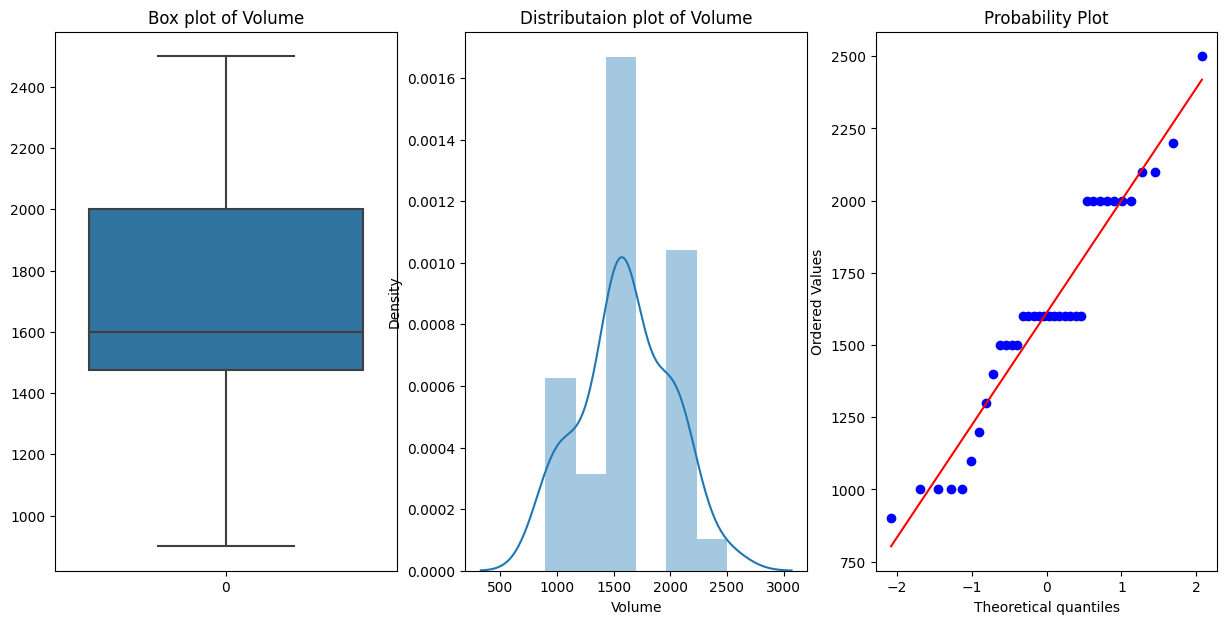

C:\Users\haier\AppData\Local\Temp\ipykernel_7116\179085340.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var])


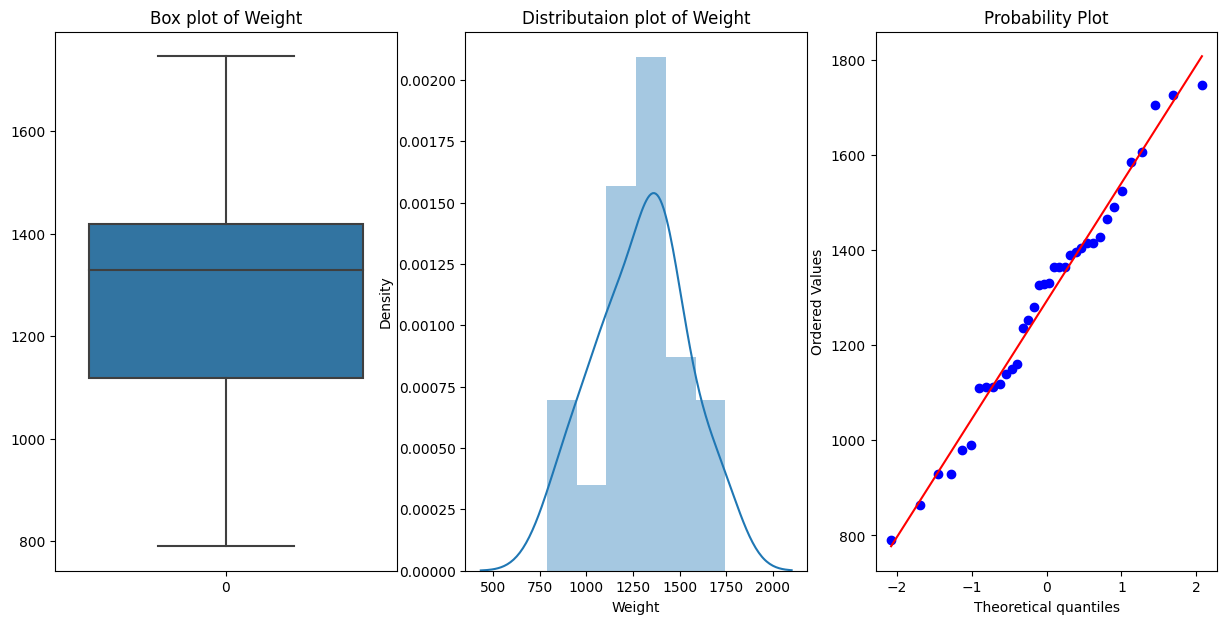

C:\Users\haier\AppData\Local\Temp\ipykernel_7116\179085340.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var])


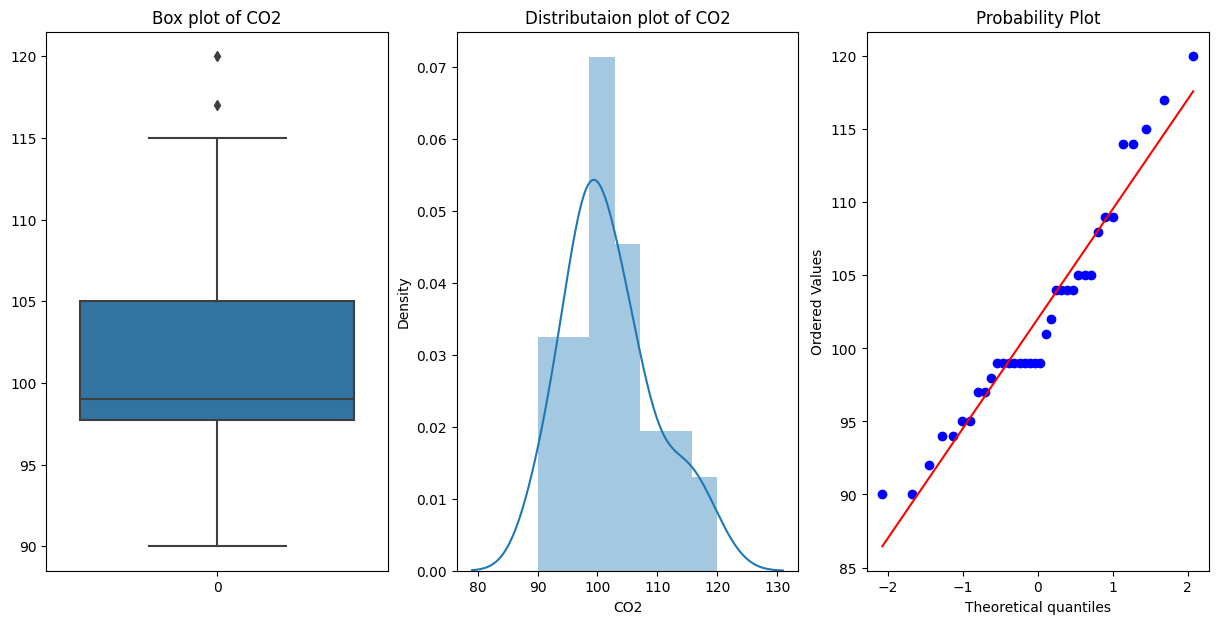

In [6]:
num_var=df.select_dtypes(include=[np.number])
from scipy import stats
def norm_test(var, df):
    fig= plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    sns.boxplot(df[var])
    plt.title(f'Box plot of {var}')
    
    
    #fig= plt.figure(figsize=(9,5))
    plt.subplot(1,3,2)
    sns.distplot(df[var])
    plt.title(f'Distributaion plot of {var}')
    
        
    plt.subplot(1,3,3)
    stats.probplot(df[var], dist='norm', plot=plt)
    plt.show()
    
for var in num_var:
    norm_test(var, df)

# statistical Test for Normality
- There are many tests in statistic to show Wheather the data is normal\ guassian. Two most commonly use tests are:

### Shapiro Wilk Test
- It is one of the most powerful test to check the normality of a variable. If the p-value > 0.05 we will reject Null Hypothesis (Ho) i.e Ho: our variable is not normal\gaussian.
- If p-value < 0.05 we fail to  reject Null Hypothesis (H0).   

In [6]:
from scipy.stats import shapiro
def stat( var, df):
    print('\n')
    stat, p= shapiro(df[var])
    print('stats=', stat,'\n', 'p_value=', p)
    if p > 0.05:
        print('Probably Gaussian\ Normal')
    else:
        print( 'probably not Gaussian\ Normal')
    
for var in num_var:
    stat(var, df)



stats= 0.9345651268959045 
 p_value= 0.034496817737817764
probably not Gaussian\ Normal


stats= 0.9767938852310181 
 p_value= 0.6365246772766113
Probably Gaussian\ Normal


stats= 0.9446024894714355 
 p_value= 0.07074549794197083
Probably Gaussian\ Normal


### D Agostino k^2 normality test
- This test check the normality base on skewness and kurtosis.
- **Skewness** It is a measure of the asymmetry of the probablity distribution. 
- **Kurtosis** measures  how much skewed the data is: Wheather data are heavy tailed or light tailed

In [7]:
# D Agostino k^2 normality test
from scipy.stats import normaltest
def stat( var, df):
    print('\n')
    stat, p= normaltest(df[var])
    print('stats=', stat,'\n', 'p_value=', p)
    if p > 0.05:
        print('Probably Gaussian\ Normal')
    else:
        print( 'probably not Gaussian\ Normal')
    
for var in num_var:
    stat(var, df)



stats= 0.177269414206123 
 p_value= 0.9151798212097011
Probably Gaussian\ Normal


stats= 0.3934629511550105 
 p_value= 0.8214111726620019
Probably Gaussian\ Normal


stats= 2.872633383295453 
 p_value= 0.2378020458206841
Probably Gaussian\ Normal


# Relationship

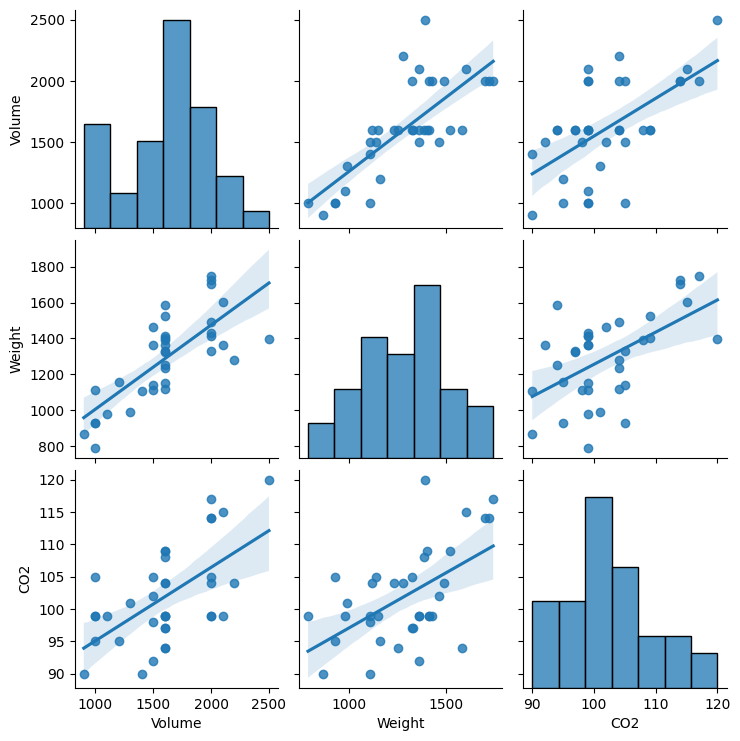

In [9]:
sns.pairplot(df, kind='reg')

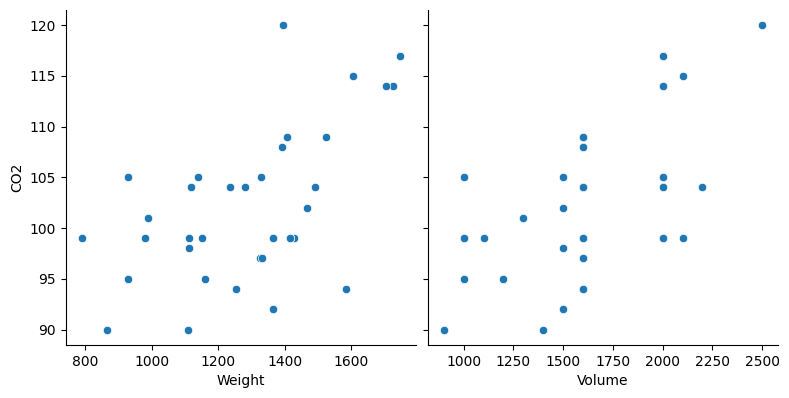

In [112]:
sns.pairplot(df, x_vars=['Weight', 'Volume'], y_vars='CO2', height=4, aspect=1, kind='scatter')

In [11]:
df.corr().style.background_gradient(cmap='Blues')

,Volume,Weight,CO2
Volume,1.000000,0.753537,0.592082
Weight,0.753537,1.000000,0.552150
CO2,0.592082,0.552150,1.000000


<AxesSubplot:>

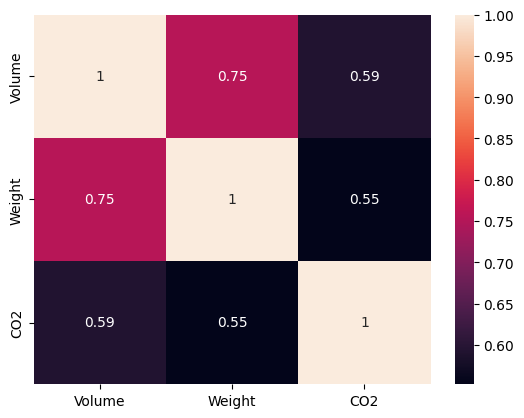

In [104]:
sns.heatmap(df.corr(), annot=True)

In [52]:
X=df[['Volume', 'Weight']]
y=df['CO2']

# Multi Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [84]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest= train_test_split(X,y, test_size=0.2, random_state=0)
print( 'The X_train dataset=', Xtrain.shape)
print( 'The X_test dataset=', Xtest.shape)
print( 'The y_train dataset=', ytrain.shape)
print( 'The y_test dataset=', ytest.shape)


The X_train dataset= (28, 2)
The X_test dataset= (8, 2)
The y_train dataset= (28,)
The y_test dataset= (8,)


In [113]:
model=LinearRegression().fit(Xtrain, ytrain)
model

LinearRegression()

In [114]:
yhat=model.predict(Xtest)

In [87]:
print(model.intercept_)
print(model.coef_)

80.57109791690918
[0.0076251  0.00728963]


In [108]:
error=pd.DataFrame({'Actual_value': ytest, 
                   'Predicted_value': yhat, 
                   'Error': ytest-yhat})
error

,Actual_value,Predicted_value,Error
31,117,108.549002,8.450998
20,94,104.318040,-10.318040
16,99,102.721611,-3.721611
30,115,108.283675,6.716325
22,99,106.534163,-7.534163
15,97,102.466474,-5.466474
10,99,96.102551,2.897449
2,95,94.968269,0.031731


**Mean Squared Error:** This measures the squared average distance of the actual value and the predicted value of a model.

**Mean Absolute Error:** It measures the absolute average distance between actual value and predicted value of a model.

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MSE=mean_squared_error(ytest, yhat)
MBE=mean_absolute_error(ytest, yhat)
print(f'The mean squared error: {MSE: .3f}')
print(f'The mean absolute error: {MBE: .3f}')

The mean squared error:  41.485
The mean absolute error:  5.642


In [96]:
# model fitness
from sklearn.metrics import r2_score
score=r2_score(ytest, yhat)
score

0.40615897189660677